In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd

%matplotlib inline 

### Read in the dataframes (cancer, income)

* Keep only the rows where facilities are in TN.

In [2]:
# create cancer_costs_df from mmd_cancer_data.csv
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151


In [3]:
# keep only rows where state = TENNESSEE
cancer_costs_tn = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

In [4]:
print(cancer_costs_tn.shape) #prints (rows,columns)

(95, 17)


In [5]:
cancer_costs_tn['county'].nunique() # 95 counties represented

95

In [6]:
income_df = pd.read_csv('../data/irs_county_2016.csv')
income_df.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152


In [7]:
# keep data only in TN
income_tn = income_df.loc[income_df['STATE'] == 'TN'] 
income_tn.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510


In [8]:
print(income_tn.shape)

(768, 148)


### Modify income_tn dataframe
* slice (select) columns you want from dataframe
* rename necessary columns

In [9]:
# select/slice only the columns we want from income_df
income_tn = income_tn[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1',
                       'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 
                       'A02650', 'N02300', 'A02300']]
# rename columns
income_tn.columns = ['state', 'county', 'income_bucket', 
                     'return_count', 'single_returns', 'joint_returns', 
                     'head_of_house_returns', 'exemptions', 'dependents', 
                     'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 
                     'returns_with_unemployment', 'unemployment_comp']
income_tn.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


In [10]:
# delete rows in income_tn that has county listed as Tennessee
income_tn = income_tn.drop([19752, 19753, 19754, 19755, 19756, 19757, 19758, 19759], axis =0)
income_tn.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156
19762,TN,Anderson County,3,8190,4670,1500,1840,13930,4590,1950,140592,8190,142497,180,597
19763,TN,Anderson County,4,8280,3750,2810,1440,16160,5090,2030,298169,8280,300960,200,699
19764,TN,Anderson County,5,4630,1390,2720,420,10470,3110,1510,284857,4630,287608,140,539
19765,TN,Anderson County,6,2950,510,2270,130,7320,2110,1090,255501,2950,257993,60,236
19766,TN,Anderson County,7,3850,380,3350,110,10020,2820,1530,516344,3850,521922,60,225
19767,TN,Anderson County,8,830,60,740,0,2150,580,400,292013,830,298832,0,0
19768,TN,Bedford County,1,350,180,160,0,560,60,190,-29152,270,-28891,0,0
19769,TN,Bedford County,2,3010,2230,340,410,3410,940,570,16447,3010,16807,40,86


### Look at distribtion of analysis_value within state of TN for cancer_cost_tn

In [11]:
cancer_costs_tn_urban = cancer_costs_tn.loc[cancer_costs_tn['urban'] == 'Urban']

In [12]:
cancer_costs_tn_urban.analysis_value.describe()

count       38.000000
mean     19638.605263
std       2712.218435
min      15454.000000
25%      17674.750000
50%      19203.500000
75%      20556.750000
max      27740.000000
Name: analysis_value, dtype: float64

In [13]:
cancer_costs_tn_rural = cancer_costs_tn.loc[cancer_costs_df['urban'] == 'Rural']

In [14]:
cancer_costs_tn_rural.analysis_value.describe()

count       57.000000
mean     19837.421053
std       2255.416100
min      15531.000000
25%      18328.000000
50%      19633.000000
75%      21315.000000
max      25909.000000
Name: analysis_value, dtype: float64

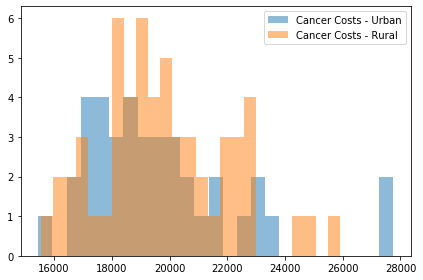

In [15]:
# make a histogram to compare rural and urban distribution in cancer_cost_tn
fig, ax = plt.subplots(facecolor='white') # makes entire background white
cancer_hist = cancer_costs_tn.analysis_value[cancer_costs_tn.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Cancer Costs - Urban')
cancer_costs_tn.analysis_value[cancer_costs_tn.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Cancer Costs - Rural')
cancer_hist.legend()
plt.tight_layout()
plt.grid(False)
plt.savefig('../assets/cancer_cost_urbanvrural_copy.png', dpi = 300);

### Create income_dict, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions as values
* `('Total', 'Under $1', 'Between 1 and $10,000', 'Between 10,000 and $25,000','Between 25,000 and $50,000', 'Between 50,000 and $75,000', 'Between 75,000 and $100,000', 'Between 100,000 and $200,000', '$200,000 or more')`

In [16]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 
              3: 'Between 10,000 and $25,000',4:'Between 25,000 and $50,000', 
               5:'Between 50,000 and $75,000', 6:'Between 75,000 and $100,000', 
               7:'Between 100,000 and $200,000', 8:'$200,000 or more'}

### Pass the dictionary as an argument to the pandas .replace() method to change the income_bucket column so that it uses descriptive text instead of the numeric code.

In [17]:
income_tn.income_bucket = income_tn.income_bucket.replace(income_dict)
income_tn.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19760,TN,Anderson County,Under $1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,"Between 1 and $10,000",5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


### Create a new dataframe income_county_agg to show totals for each county. 
* Use the pandas groupby() method to group the data by county and get the sum() of all numeric columns for that county.
* Be sure to also reset_index() so that our aggregated data is re-indexed to begin at 0.
* Which county has the greatest number of returns? Does it also have the greatest total income?

In [18]:
income_county_agg = income_tn.groupby('county').sum()
income_county_agg.head()

,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
county,,,,,,,,,,,,
Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [19]:
income_county_agg = income_county_agg.reset_index()
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023


In [20]:
# which county has the greatest number of returns?
income_county_agg = income_county_agg.loc[income_county_agg['county'] != 'Tennessee']
income_county_agg.loc[income_county_agg.return_count.idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

### Create a calculated column in the income_county_agg DataFrame which gives the approximate average household income for each county. Calculate this as 1000*total_inc_amt / return_count.

In [21]:
income_county_agg['approx_avg_income'] = round(1000 * income_county_agg['total_inc_amt']/income_county_agg['return_count'], 0)
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.0


### Create a histogram showing the distribution of average incomes across all counties in Tennessee. Be sure to remove the Tennessee row prior to creating this histogram

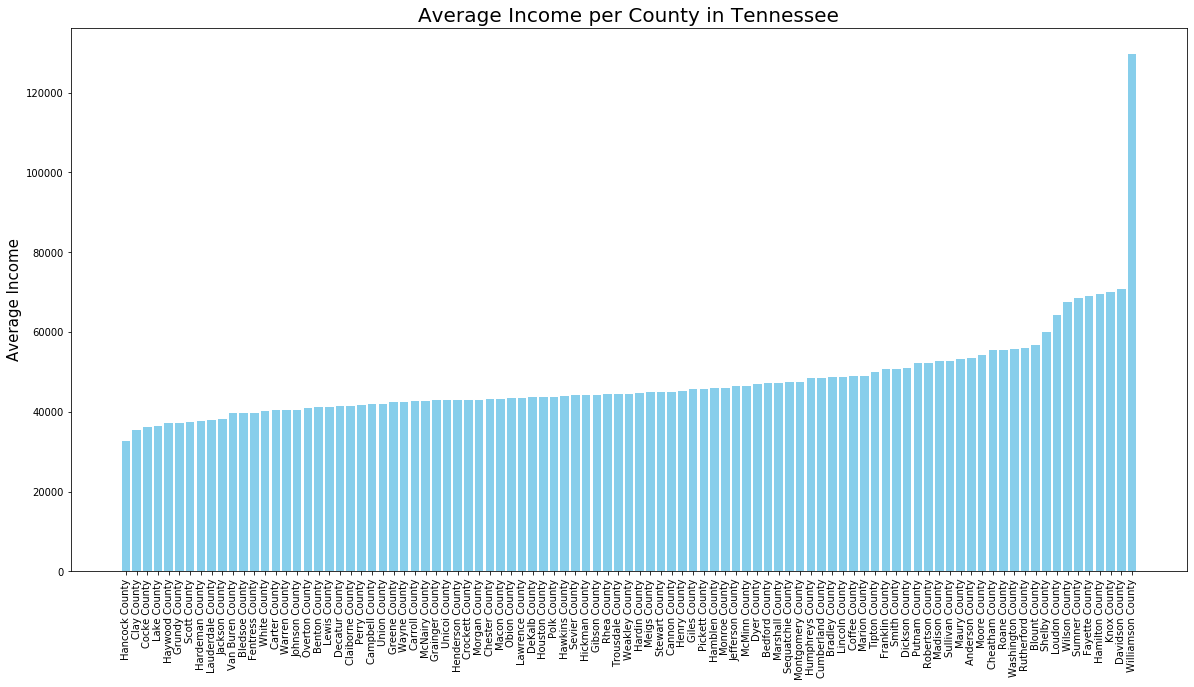

In [22]:
data = income_county_agg.sort_values('approx_avg_income')
plt.figure(figsize = (20,10))
# fig, ax = plt.subplots(facecolor='white')
plt.bar('county', 'approx_avg_income', data = data, color = 'skyblue')
plt.xticks(rotation = 90)
plt.ylabel('Average Income', fontsize=15)
plt.grid(False)
plt.title('Average Income per County in Tennessee', fontsize=20)
plt.savefig('../assets/avg_income_per_county_tn.png', dpi = 300);

In [23]:
income_county_agg.tail(5)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
90,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42557.0
91,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.0
92,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40297.0
93,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129769.0
94,Wilson County,64160,26680,29070,6880,128480,40230,15240,4256127,64000,4325080,1010,3424,67411.0


county                       Wilson County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
approx_avg_income                   129769
dtype: object

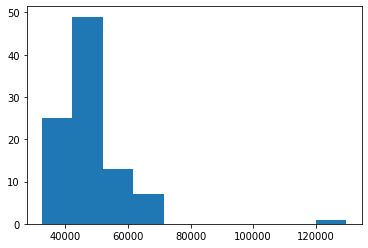

In [25]:
# another way to actually make histogram
# with amount of counties as y-axis, and avg income as x-axis
data = income_county_agg.sort_values('approx_avg_income')
plt.hist('approx_avg_income', data=data)
data.max() # will tell you which county has the highest avg income

### For both tn_cancer_costs and tn_ha_costs, create boxplots and swarmplots comparing the distribution of analysis_value for urban counties vs. rural counties. What do you notice?

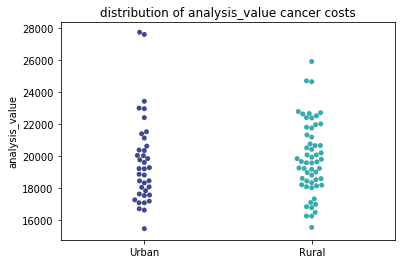

In [26]:
sns.swarmplot(x=cancer_costs_tn.urban, y=cancer_costs_tn.analysis_value, palette = 'mako')
plt.grid(False)
plt.title('distribution of analysis_value cancer costs')
plt.xlabel('');

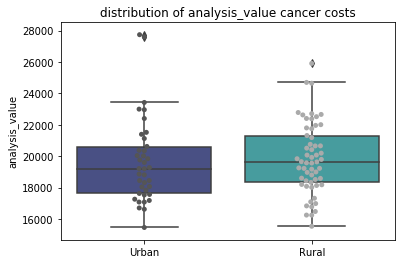

In [27]:
# can overlay swarmplot on boxplot
sns.boxplot(y=cancer_costs_tn.analysis_value, x = cancer_costs_tn.urban, palette = "mako" )
sns.swarmplot(x=cancer_costs_tn.urban, y=cancer_costs_tn.analysis_value, palette = 'gist_gray')
plt.xlabel('')
plt.title('distribution of analysis_value cancer costs');


####  In `cancer_costs_tn` DataFrame, rename the `analysis_value` column to `cancer_avg_cost`

In [28]:
# rename analysis_value to ha_avg_cost
cancer_costs_tn = cancer_costs_tn.rename(columns = {'analysis_value':'cancer_avg_cost'})
cancer_costs_tn.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


In [29]:
income_county_agg

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42557.0
91,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.0
92,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40297.0
93,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129769.0


In [30]:
# slice the columns we want from cancer_costs_tn df
cancer_costs_tn = cancer_costs_tn[['county','urban', 'cancer_avg_cost']]
cancer_costs_tn.head()

,county,urban,cancer_avg_cost
2396,Anderson County,Urban,15454
2397,Bedford County,Rural,19219
2398,Benton County,Rural,21315
2399,Bledsoe County,Rural,19250
2400,Blount County,Urban,17073


In [31]:
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0


#### Merge cancer_costs_tn df with `county` and `approx_avg_income` columns from income_county_agg df

In [32]:
tn_df = pd.merge(cancer_costs_tn, income_county_agg[['county', 'approx_avg_income']], on = 'county', how = 'inner')
tn_df.head()

,county,urban,cancer_avg_cost,approx_avg_income
0,Anderson County,Urban,15454,53382.0
1,Bedford County,Rural,19219,47128.0
2,Benton County,Rural,21315,41297.0
3,Bledsoe County,Rural,19250,39744.0
4,Blount County,Urban,17073,56786.0


#### Create a new column `cancer_cost_ratio` by dividing ha_avg_cost and cancer_avg_cost respectively by avg_income

In [34]:
tn_df['cancer_cost_ratio'] = tn_df['cancer_avg_cost']/tn_df['approx_avg_income']
tn_df.head(2)

,county,urban,cancer_avg_cost,approx_avg_income,cancer_cost_ratio
0,Anderson County,Urban,15454,53382.0,0.289498
1,Bedford County,Rural,19219,47128.0,0.407804


## Create models for TN counties

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from cm import plot_confusion_matrix

import warnings
%matplotlib inline 

warnings.filterwarnings('ignore')

In [36]:
tn_df.head()

,county,urban,cancer_avg_cost,approx_avg_income,cancer_cost_ratio
0,Anderson County,Urban,15454,53382.0,0.289498
1,Bedford County,Rural,19219,47128.0,0.407804
2,Benton County,Rural,21315,41297.0,0.516139
3,Bledsoe County,Rural,19250,39744.0,0.484350
4,Blount County,Urban,17073,56786.0,0.300655


In [38]:
# identify mean and stats of cancer_cost_ratio column
tn_df.cancer_cost_ratio.describe()

count    95.000000
mean      0.432218
std       0.097560
min       0.135063
25%       0.364157
50%       0.430877
75%       0.483406
max       0.691217
Name: cancer_cost_ratio, dtype: float64

In [39]:
# set avg_cancer_ratio variable to mean of cancer_cost_ratio in merged_df
avg_cancer_ratio = tn_df.cancer_cost_ratio.mean()
avg_cancer_ratio

0.43221777245378024

In [40]:
# set the condition for the predictive model
# want to see if cancer_avg_cost is above or below the mean
tn_df['above_avg_cancer_ratio'] = tn_df['cancer_cost_ratio'] > avg_cancer_ratio
tn_df.head()

,county,urban,cancer_avg_cost,approx_avg_income,cancer_cost_ratio,above_avg_cancer_ratio
0,Anderson County,Urban,15454,53382.0,0.289498,False
1,Bedford County,Rural,19219,47128.0,0.407804,False
2,Benton County,Rural,21315,41297.0,0.516139,True
3,Bledsoe County,Rural,19250,39744.0,0.484350,True
4,Blount County,Urban,17073,56786.0,0.300655,False


#### Encode the urban/rural column using `get_dummies`

In [41]:
tn_df_dummy = pd.get_dummies(tn_df, columns = ['urban'], drop_first = True)
tn_df_dummy.head()

,county,cancer_avg_cost,approx_avg_income,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban
0,Anderson County,15454,53382.0,0.289498,False,1
1,Bedford County,19219,47128.0,0.407804,False,0
2,Benton County,21315,41297.0,0.516139,True,0
3,Bledsoe County,19250,39744.0,0.484350,True,0
4,Blount County,17073,56786.0,0.300655,False,1


In [42]:
tn_df_dummy.shape

(95, 6)

In [43]:
avg_income = tn_df_dummy.approx_avg_income.mean()
avg_income

47671.95789473684

In [44]:
tn_df_dummy['above_avg_income'] = tn_df_dummy['approx_avg_income'] > avg_income
tn_df_dummy.head()

,county,cancer_avg_cost,approx_avg_income,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban,above_avg_income
0,Anderson County,15454,53382.0,0.289498,False,1,True
1,Bedford County,19219,47128.0,0.407804,False,0,False
2,Benton County,21315,41297.0,0.516139,True,0,False
3,Bledsoe County,19250,39744.0,0.484350,True,0,False
4,Blount County,17073,56786.0,0.300655,False,1,True


 ### Using `urban/rural` and `Percent Below Federal Poverty Level (5y Avg.)` to predict

Remember: A county being urban decreases the chances that the cost ratio will be above average.

 #### Incorporate some of the geographic profile data

In [45]:
geographic_info = pd.read_csv('../data/geographic_profile.csv')
geographic_info.head()

,state,county,Median Household Income (5y Average),Median Household Income for +7-person Households (5y Avg.),Median Household Income for 1-person Households (5y Avg.),Median Household Income for 2-person Households (5y Avg.),Median Household Income for 3-person Households (5y Avg.),Median Household Income for 4-person Households (5y Avg.),Median Household Income for 5-person Households (5y Avg.),Median Household Income for 6-person Households (5y Avg.),...,Percent of 3 Person Households with 3 Workers (5y Avg.),Percent of 3 Person Households with No Workers (5y Avg.),Percent of Senior Population Below Federal Poverty Level (1y Avg.),Percent of Senior Population Below Federal Poverty Level (5y Avg.),Percentage of Total Housing Units that are Vacant (1y Avg.),Percentage of Total Housing Units that are Vacant (5y Avg.),Senior Unemployment Rate (1y Avg.),Senior Unemployment Rate (5y Avg.),Unemployment Rate (1y Avg.),Unemployment Rate (5y Avg.)
0,AL,Autauga County,53099.0,104659.0,26834.0,58452.0,76406.0,74429.0,73017.0,81500.0,...,0.101183,0.106110,NaN,0.061893,NaN,0.083869,NaN,0.079755,NaN,0.055252
1,AL,Baldwin County,51365.0,86250.0,26010.0,59570.0,68369.0,79153.0,69484.0,67693.0,...,0.124101,0.129932,0.077699,0.069984,0.293833,0.274180,0.032243,0.037965,0.035886,0.062713
2,AL,Barbour County,33956.0,NaN,16450.0,42631.0,42429.0,44563.0,46563.0,48250.0,...,0.093651,0.226190,NaN,0.162366,NaN,0.221912,NaN,0.083538,NaN,0.128247
3,AL,Bibb County,39776.0,111477.0,19127.0,41183.0,43520.0,51760.0,68375.0,76579.0,...,0.110305,0.206096,NaN,0.106445,NaN,0.214445,NaN,0.036667,NaN,0.071429
4,AL,Blount County,46212.0,50723.0,22171.0,50601.0,60406.0,64705.0,54390.0,48913.0,...,0.043669,0.186762,NaN,0.098941,NaN,0.132788,NaN,0.049601,NaN,0.059515


In [46]:
geographic_info.isna().sum()
# identify how many missing items in specific columns to choose usable predictors

state                                                                    0
county                                                                   0
Median Household Income (5y Average)                                     0
Median Household Income for +7-person Households (5y Avg.)             777
Median Household Income for 1-person Households (5y Avg.)                0
Median Household Income for 2-person Households (5y Avg.)                1
Median Household Income for 3-person Households (5y Avg.)               19
Median Household Income for 4-person Households (5y Avg.)               39
Median Household Income for 5-person Households (5y Avg.)              125
Median Household Income for 6-person Households (5y Avg.)              455
Percent Below Federal Poverty Level (1y Avg.)                         2389
Percent Below Federal Poverty Level (5y Avg.)                            0
Percent of +4 Person Households with +3 Workers (5y Avg.)                0
Percent of +4 Person Hous

In [47]:
# filter for only TN
geographic_info_tn = geographic_info.loc[geographic_info['state']=='TN']
geographic_info_tn.head()

,state,county,Median Household Income (5y Average),Median Household Income for +7-person Households (5y Avg.),Median Household Income for 1-person Households (5y Avg.),Median Household Income for 2-person Households (5y Avg.),Median Household Income for 3-person Households (5y Avg.),Median Household Income for 4-person Households (5y Avg.),Median Household Income for 5-person Households (5y Avg.),Median Household Income for 6-person Households (5y Avg.),...,Percent of 3 Person Households with 3 Workers (5y Avg.),Percent of 3 Person Households with No Workers (5y Avg.),Percent of Senior Population Below Federal Poverty Level (1y Avg.),Percent of Senior Population Below Federal Poverty Level (5y Avg.),Percentage of Total Housing Units that are Vacant (1y Avg.),Percentage of Total Housing Units that are Vacant (5y Avg.),Senior Unemployment Rate (1y Avg.),Senior Unemployment Rate (5y Avg.),Unemployment Rate (1y Avg.),Unemployment Rate (5y Avg.)
2506,TN,Anderson County,44241.0,48527.0,23384.0,52854.0,58496.0,64546.0,70195.0,65686.0,...,0.102075,0.179057,0.098630,0.077402,0.102800,0.116299,0.00000,0.041965,0.085937,0.073644
2507,TN,Bedford County,43819.0,76053.0,18728.0,47993.0,52772.0,55203.0,56000.0,37250.0,...,0.102079,0.139621,NaN,0.072189,NaN,0.082537,NaN,0.030724,NaN,0.061397
2508,TN,Benton County,33611.0,31563.0,16636.0,42406.0,52361.0,48571.0,69107.0,NaN,...,0.078767,0.245434,NaN,0.149043,NaN,0.242735,NaN,0.038647,NaN,0.110525
2509,TN,Bledsoe County,38535.0,86429.0,14880.0,46345.0,38427.0,57500.0,35104.0,NaN,...,0.029260,0.259897,NaN,0.145402,NaN,0.175044,NaN,0.070796,NaN,0.093023
2510,TN,Blount County,49532.0,100714.0,25320.0,54415.0,63733.0,70554.0,68158.0,86979.0,...,0.138770,0.120489,0.061178,0.076359,0.127475,0.117404,0.04981,0.029956,0.030931,0.065083


In [48]:
geographic_info_tn.shape

(95, 33)

In [49]:
geographic_info_tn = geographic_info_tn[['county', 'Percent Below Federal Poverty Level (5y Avg.)', 'Unemployment Rate (5y Avg.)']]
geographic_info_tn.head()

,county,Percent Below Federal Poverty Level (5y Avg.),Unemployment Rate (5y Avg.)
2506,Anderson County,0.172117,0.073644
2507,Bedford County,0.162543,0.061397
2508,Benton County,0.226498,0.110525
2509,Bledsoe County,0.237262,0.093023
2510,Blount County,0.135709,0.065083


In [51]:
# merge tn_df_dummy with geographic_info_tn
tn_df_dummy = pd.merge(left = tn_df_dummy, right = geographic_info_tn)
tn_df_dummy.head()

,county,cancer_avg_cost,approx_avg_income,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban,above_avg_income,Percent Below Federal Poverty Level (5y Avg.),Unemployment Rate (5y Avg.)
0,Anderson County,15454,53382.0,0.289498,False,1,True,0.172117,0.073644
1,Bedford County,19219,47128.0,0.407804,False,0,False,0.162543,0.061397
2,Benton County,21315,41297.0,0.516139,True,0,False,0.226498,0.110525
3,Bledsoe County,19250,39744.0,0.484350,True,0,False,0.237262,0.093023
4,Blount County,17073,56786.0,0.300655,False,1,True,0.135709,0.065083


In [52]:
more_info = pd.read_csv('../data/TN_cancer_costs_merged_df.csv')
more_info.head()

,county,cancer_avg_cost,avg_income,cancer_cost_ratio,poverty_5y,Unemployment,numbers_hospitals,population_2019,under5,under18,...,above_avg_cancer_ratio,above_avg_income,%smoker,percent_smokers,%obesity,percent_adult_obesity,% drinkers,percent_excessive_drinkers,% unemployment,percent_unemployment_2020
0,Anderson County,15454,53617,0.288229,0.172117,0.073644,2,76978,5.4,21.2,...,False,True,20.92502,0.209250,32.9,0.33,14.3253,0.143253,3.8,0.037570
1,Bedford County,19219,47308,0.406253,0.162543,0.061397,0,49713,6.7,25.4,...,False,False,22.69253,0.226925,33.6,0.34,15.7168,0.157168,3.7,0.037490
2,Benton County,21315,41485,0.513800,0.226498,0.110525,1,16160,5.1,19.9,...,True,False,23.65874,0.236587,34.6,0.35,12.4818,0.124818,4.9,0.049065
3,Bledsoe County,19250,39919,0.482227,0.237262,0.093023,1,15064,3.7,14.5,...,True,False,24.66140,0.246614,32.7,0.33,14.5430,0.145430,5.8,0.058099
4,Blount County,17073,56978,0.299642,0.135709,0.065083,2,133088,4.9,19.9,...,False,True,21.32230,0.213223,32.9,0.33,14.8943,0.148943,3.2,0.032260


In [53]:
tn_df_dummy = pd.merge(left = tn_df_dummy, right = more_info[['county','numbers_hospitals', 'percent_uninsured', 'percent_smokers','percent_adult_obesity','percent_excessive_drinkers', 'percent_unemployment_2020', 'over65']], on ='county')
tn_df_dummy.head()

,county,cancer_avg_cost,approx_avg_income,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban,above_avg_income,Percent Below Federal Poverty Level (5y Avg.),Unemployment Rate (5y Avg.),numbers_hospitals,percent_uninsured,percent_smokers,percent_adult_obesity,percent_excessive_drinkers,percent_unemployment_2020,over65
0,Anderson County,15454,53382.0,0.289498,False,1,True,0.172117,0.073644,2,11.6,0.209250,0.33,0.143253,0.037570,20.3
1,Bedford County,19219,47128.0,0.407804,False,0,False,0.162543,0.061397,0,14.7,0.226925,0.34,0.157168,0.037490,15.2
2,Benton County,21315,41297.0,0.516139,True,0,False,0.226498,0.110525,1,12.7,0.236587,0.35,0.124818,0.049065,23.9
3,Bledsoe County,19250,39744.0,0.484350,True,0,False,0.237262,0.093023,1,17.7,0.246614,0.33,0.145430,0.058099,18.8
4,Blount County,17073,56786.0,0.300655,False,1,True,0.135709,0.065083,2,11.4,0.213223,0.33,0.148943,0.032260,20.6


 #### Using `urban/rural` and `Percent Below Federal Poverty Level (5y Avg.)` to predict

In [54]:
X = tn_df_dummy[['urban_Urban', 'Percent Below Federal Poverty Level (5y Avg.)']]
y = tn_df_dummy.above_avg_cancer_ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2020)

logistic_model_1 = LogisticRegression()
logistic_model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

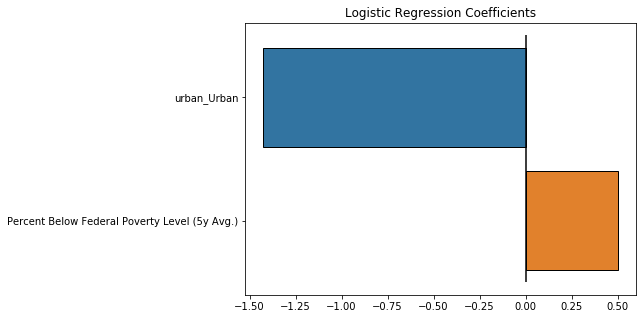

In [55]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = logistic_model_1.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')
ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

In [56]:
y_pred = logistic_model_1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5


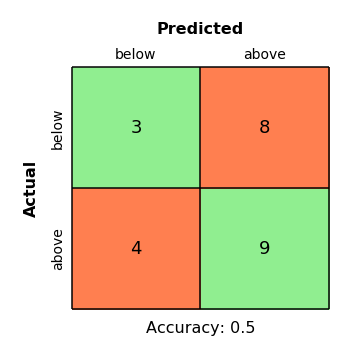

In [57]:
plot_confusion_matrix(y_test, y_pred, labels = ['below', 'above'], metric = 'accuracy')

In [59]:
y_pred_prob = logistic_model_1.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6783216783216784


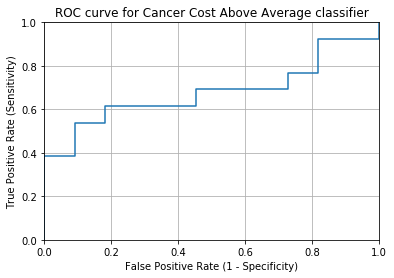

In [60]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Cancer Cost Above Average classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

In [65]:
forest1 = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5)
forest1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
y_pred_train = forest1.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.7887323943661971


In [67]:
y_pred = forest1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
# lower gap between training prediction and test prediction, so more accurate

0.7083333333333334


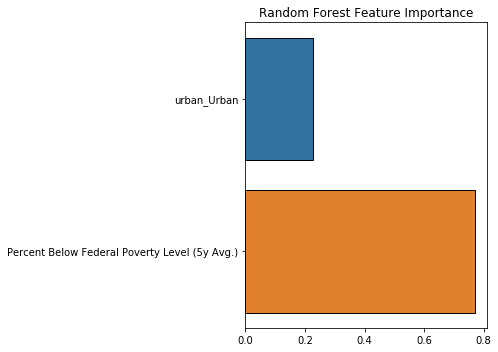

In [68]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest1.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('../assets/random_forest_feature_importance1.png', dpi = 300);

In [69]:
X = tn_df_dummy[['urban_Urban', 'Percent Below Federal Poverty Level (5y Avg.)','Unemployment Rate (5y Avg.)']]
y = tn_df_dummy.above_avg_cancer_ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2020)

logistic_model_2 = LogisticRegression()
logistic_model_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

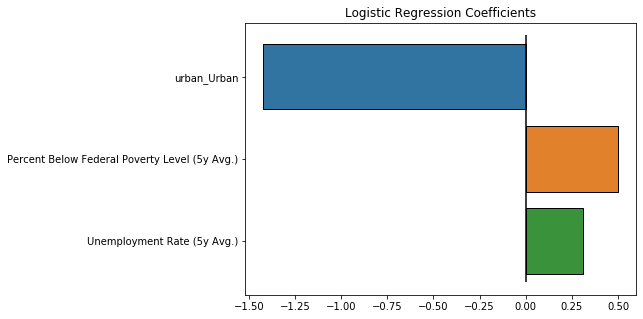

In [70]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = logistic_model_2.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')
ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

In [71]:
y_pred = logistic_model_2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5


In [72]:
forest2 = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5)
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred_train = forest2.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8591549295774648


In [75]:
y_pred = forest2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5416666666666666


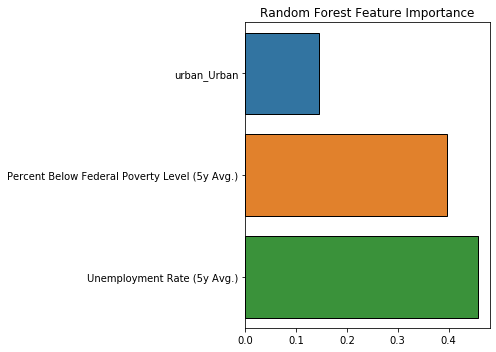

In [76]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest2.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('../assets/random_forest_feature_importance1.png', dpi = 300);

In [77]:
tn_df_dummy.head()

,county,cancer_avg_cost,approx_avg_income,cancer_cost_ratio,above_avg_cancer_ratio,urban_Urban,above_avg_income,Percent Below Federal Poverty Level (5y Avg.),Unemployment Rate (5y Avg.),numbers_hospitals,percent_uninsured,percent_smokers,percent_adult_obesity,percent_excessive_drinkers,percent_unemployment_2020,over65
0,Anderson County,15454,53382.0,0.289498,False,1,True,0.172117,0.073644,2,11.6,0.209250,0.33,0.143253,0.037570,20.3
1,Bedford County,19219,47128.0,0.407804,False,0,False,0.162543,0.061397,0,14.7,0.226925,0.34,0.157168,0.037490,15.2
2,Benton County,21315,41297.0,0.516139,True,0,False,0.226498,0.110525,1,12.7,0.236587,0.35,0.124818,0.049065,23.9
3,Bledsoe County,19250,39744.0,0.484350,True,0,False,0.237262,0.093023,1,17.7,0.246614,0.33,0.145430,0.058099,18.8
4,Blount County,17073,56786.0,0.300655,False,1,True,0.135709,0.065083,2,11.4,0.213223,0.33,0.148943,0.032260,20.6


In [80]:
X = tn_df_dummy[['urban_Urban', 'Percent Below Federal Poverty Level (5y Avg.)','percent_uninsured', 'numbers_hospitals', 'percent_smokers', 'percent_adult_obesity', 'percent_excessive_drinkers','over65']]
y = tn_df_dummy.above_avg_cancer_ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2020)

logistic_model_3 = LogisticRegression()
logistic_model_3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

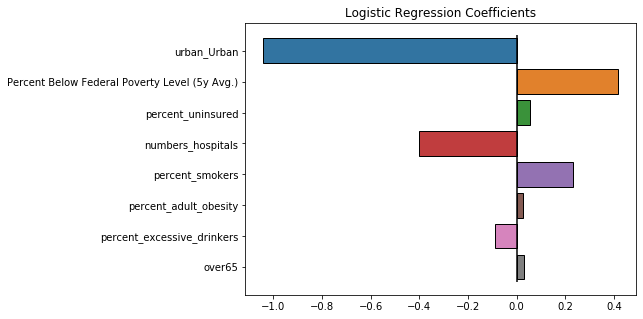

In [81]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = logistic_model_3.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')
ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

In [83]:
y_pred = logistic_model_3.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5


In [84]:
forest3 = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5)
forest3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
y_pred_train = forest3.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8591549295774648


In [86]:
y_pred = forest3.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
# lower gap between training prediction and test prediction, so more accurate

0.7083333333333334


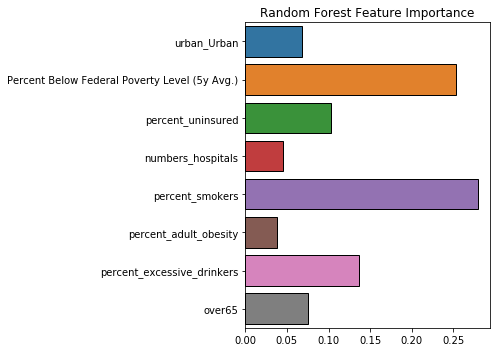

In [87]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest3.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('../assets/random_forest_feature_importance1.png', dpi = 300);